In [1]:
# Import to shut down the warning about tensorflow compilation with avx
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

# util routines to prepare and plot the data
from utils import *

# Set the seed for reproducible results
set_seed()

## Data preparation

In [2]:
dataset = load_data("data/{}.csv".format('BH_tcs'))
dataset = prepare_targets_tcs(dataset)
train_data, train_targets, val_data, val_targets, test_data, test_targets = train_test_split(dataset)

Train / Val / Test set: 700000 / 150000 / 150000


## Fit a few models

In [3]:
from itertools import product

# List to store the results
results = list()
histories = list()

n_layers = 2
batch_size = int(0.005 * train_data.shape[0])
n_nodes_range = np.array([8, 16])

print('Fitting model for ...')

# Loop on the parameters
for n_nodes in n_nodes_range:

    message = 'n_nodes={:03d}'.format(n_nodes)
    print(message)

    # Build model with the specific parameters
    model = build_model_tcs(n_layers, n_nodes)

    # Fit the model
    history = model.fit(train_data, train_targets,
                        epochs = 100,
                        batch_size = batch_size,
                        validation_data = (val_data, val_targets),
                        #verbose=0,
                        )

    # Save the model
    filename = "models/BH_tcs_" + message + ".h5"
    model.save(filename)

    # Save the history
    histories.append(history)

    # test set
    keys = model.metrics_names
    values = model.evaluate(test_data, test_targets, verbose=0)
    test_errors = dict(map(lambda i,j : (i,j) , keys, values))

    # Store the result
    results.append(test_errors['mape'])

results = np.array(results)

Fitting model for ...
n_nodes=008
Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.0012 - mape: 25.6364 - mse: 0.0012 - val_loss: 0.0048 - val_mape: 37.9431 - val_mse: 0.0048
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 3.0743e-04 - mape: 12.3597 - mse: 3.0743e-04 - val_loss: 5.5217e-04 - val_mape: 12.8885 - val_mse: 5.5217e-04
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 2.5733e-04 - mape: 9.9531 - mse: 2.5733e-04 - val_loss: 2.1688e-04 - val_mape: 6.8603 - val_mse: 2.1688e-04
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 2.3745e-04 - mape: 9.4978 - mse: 2.3745e-04 - val_loss: 2.5731e-04 - val_mape: 11.0706 - val_mse: 2.5731e-04
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 2.2004e-04 - mape: 9.2824 - mse: 2.2004e-04 - val_loss: 2.0176e-04 - val_mape: 7.8977 - val_mse: 2.0176e-04
Epoch 6/100
200/200 [==============================] - 0s 2ms/

## Explore the models

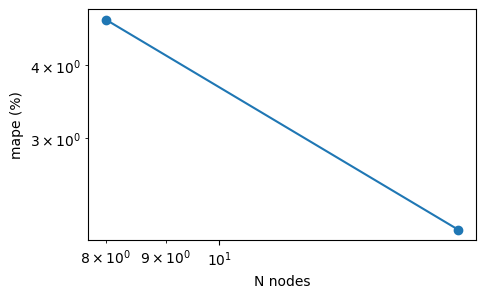

In [4]:
fig, axs = plt.subplots(1,1,figsize=(5,3))
plt.plot(n_nodes_range, results, marker='o')
plt.xlabel('N nodes')
plt.xscale('log')
plt.ylabel('mape (%)')
plt.yscale('log')
plt.show()

## Role of n_nodes on validation loss

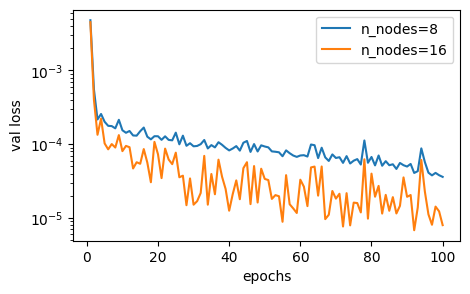

In [5]:
fig, axs = plt.subplots(1,1,figsize=(5,3))

i = 0
for history in histories:
    val_loss = history.history['val_loss']
    epochs = np.linspace(1, len(val_loss), len(val_loss))
    label='n_nodes={:d}'.format(n_nodes_range[i])
    plt.plot(epochs, val_loss, label=label)
    i+=1

plt.xlabel('epochs')
plt.ylabel('val loss')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

## Role of n_nodes on training loss

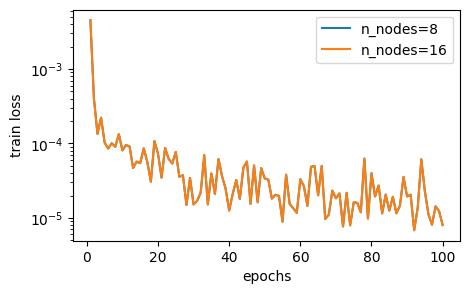

In [6]:
fig, axs = plt.subplots(1,1,figsize=(5,3))

i = 0
for history in histories:
    loss = history.history['loss']
    epochs = np.linspace(1, len(loss), len(loss))
    label='n_nodes={:d}'.format(n_nodes_range[i])
    plt.plot(epochs, val_loss, label=label)
    i+=1

plt.xlabel('epochs')
plt.ylabel('train loss')
plt.yscale('log')
plt.legend(loc='best')
plt.show()